# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | makueni boma
Processing Record 2 of Set 1 | zaragoza
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | homosassa springs
Processing Record 5 of Set 1 | elliot lake
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | basco
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | colonia
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | post
Processing Record 13 of Set 1 | shache
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | baoqing
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | praia da vitoria
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | san julian
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 

Processing Record 42 of Set 4 | cruzeiro do sul
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | mbala
Processing Record 45 of Set 4 | kapuskasing
Processing Record 46 of Set 4 | kas
Processing Record 47 of Set 4 | udachny
Processing Record 48 of Set 4 | happy valley-goose bay
Processing Record 49 of Set 4 | koz'modem'yansk
Processing Record 0 of Set 5 | iskateley
Processing Record 1 of Set 5 | quang ngai
Processing Record 2 of Set 5 | vallenar
Processing Record 3 of Set 5 | paracuru
Processing Record 4 of Set 5 | gambiran satu
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | cooper's town
Processing Record 7 of Set 5 | nova vicosa
Processing Record 8 of Set 5 | flying fish cove
Processing Record 9 of Set 5 | vicuna
Processing Record 10 of Set 5 | yreka
Processing Record 11 of Set 5 | mahbubabad
Processing Record 12 of Set 5 | alpine
Processing Record 13 of Set 5 | charters towers
Processing Record 14 of Set 5 | enshi
Processing Record 15 

Processing Record 37 of Set 8 | namibe
Processing Record 38 of Set 8 | birao
Processing Record 39 of Set 8 | xuanzhou
Processing Record 40 of Set 8 | kaa-khem
Processing Record 41 of Set 8 | meadow lakes
Processing Record 42 of Set 8 | acajutla
Processing Record 43 of Set 8 | ambositra
Processing Record 44 of Set 8 | ta`u
Processing Record 45 of Set 8 | bridgewater
Processing Record 46 of Set 8 | ust'-ilimsk
Processing Record 47 of Set 8 | mchinji
Processing Record 48 of Set 8 | ushtobe
Processing Record 49 of Set 8 | syumsi
Processing Record 0 of Set 9 | mangaratiba
Processing Record 1 of Set 9 | san fernando del valle de catamarca
Processing Record 2 of Set 9 | balykshi
Processing Record 3 of Set 9 | ndele
Processing Record 4 of Set 9 | bandon
Processing Record 5 of Set 9 | aljezur
Processing Record 6 of Set 9 | rio grande
Processing Record 7 of Set 9 | yanchep
Processing Record 8 of Set 9 | malone
Processing Record 9 of Set 9 | mangalia
Processing Record 10 of Set 9 | lospalos
Proce

Processing Record 26 of Set 12 | port antonio
Processing Record 27 of Set 12 | druskininkai
Processing Record 28 of Set 12 | ghadamis
Processing Record 29 of Set 12 | ketchikan
Processing Record 30 of Set 12 | pyshma
Processing Record 31 of Set 12 | tarnogskiy gorodok
Processing Record 32 of Set 12 | zouerate
Processing Record 33 of Set 12 | aguadilla
Processing Record 34 of Set 12 | saint-joseph
Processing Record 35 of Set 12 | puerto madryn
Processing Record 36 of Set 12 | valognes
Processing Record 37 of Set 12 | mazagao
Processing Record 38 of Set 12 | ishtixon shahri
City not found. Skipping...
Processing Record 39 of Set 12 | burang
Processing Record 40 of Set 12 | jombang
Processing Record 41 of Set 12 | anna regina
Processing Record 42 of Set 12 | baracoa
Processing Record 43 of Set 12 | puerto leguizamo
Processing Record 44 of Set 12 | kuala terengganu
Processing Record 45 of Set 12 | augsburg
Processing Record 46 of Set 12 | kolonia
Processing Record 47 of Set 12 | arkhangel'

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,makueni boma,-1.8041,37.6203,296.77,45,75,5.79,KE,1696098281
1,zaragoza,41.6561,-0.8773,303.60,32,0,0.45,ES,1696098160
2,alice springs,-23.7000,133.8833,289.90,31,22,0.00,AU,1696098281
3,homosassa springs,28.8036,-82.5759,306.06,71,75,3.60,US,1696098281
4,elliot lake,46.3834,-82.6331,294.97,55,48,2.87,CA,1696098281


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy\cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makueni boma,-1.8041,37.6203,296.77,45,75,5.79,KE,1696098281
1,zaragoza,41.6561,-0.8773,303.60,32,0,0.45,ES,1696098160
2,alice springs,-23.7000,133.8833,289.90,31,22,0.00,AU,1696098281
3,homosassa springs,28.8036,-82.5759,306.06,71,75,3.60,US,1696098281
4,elliot lake,46.3834,-82.6331,294.97,55,48,2.87,CA,1696098281


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

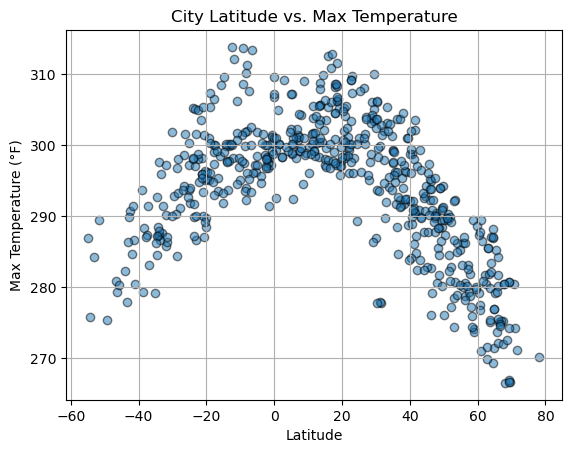

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

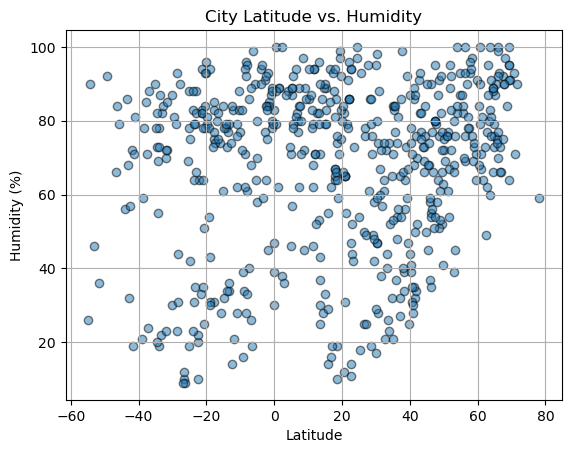

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

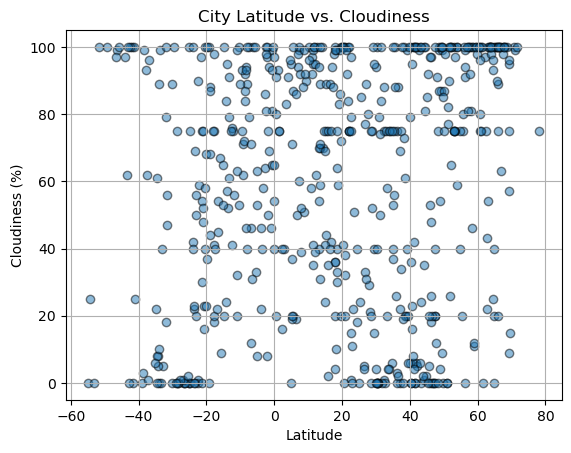

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

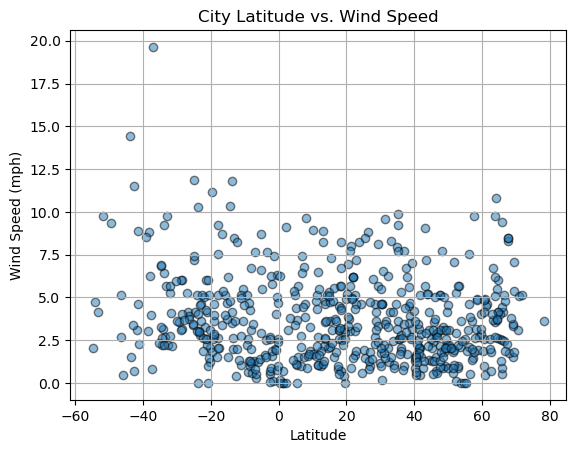

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,zaragoza,41.6561,-0.8773,303.60,32,0,0.45,ES,1696098160
3,homosassa springs,28.8036,-82.5759,306.06,71,75,3.60,US,1696098281
4,elliot lake,46.3834,-82.6331,294.97,55,48,2.87,CA,1696098281
6,hadibu,12.6500,54.0333,300.34,82,100,0.98,YE,1696098282
7,basco,20.4487,121.9702,301.99,82,100,6.94,PH,1696098282


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makueni boma,-1.8041,37.6203,296.77,45,75,5.79,KE,1696098281
2,alice springs,-23.7000,133.8833,289.90,31,22,0.00,AU,1696098281
5,port-aux-francais,-49.3500,70.2167,275.37,92,100,9.35,TF,1696098281
12,ancud,-41.8697,-73.8203,284.65,72,100,3.08,CL,1696098282
15,adamstown,-25.0660,-130.1015,293.68,88,100,11.86,PN,1696098283


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.6739145059352701


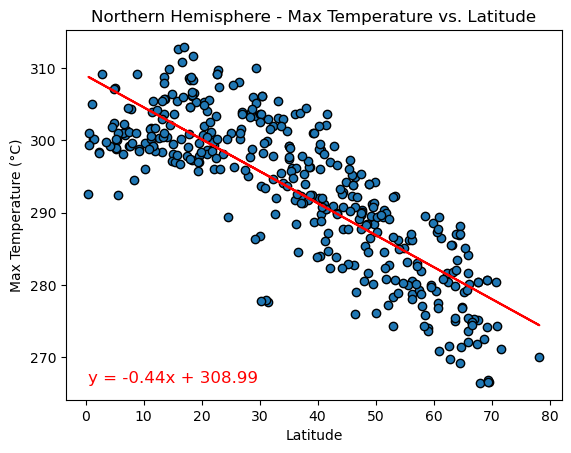

In [20]:
# Linear regression on Northern Hemisphere for Temperature vs. Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the linear regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', edgecolors='black')

# Add the regression line to the plot
plt.plot(x_values, regress_values, "r-")

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Set plot title and labels
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Print the r-squared value
print(f"R-squared: {r_value**2}")

# Save the plot as an image
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Northern_Hemi_Temp_vs_Lat.png")

# Show the plot
plt.show()

R-squared: 0.47574954937037794


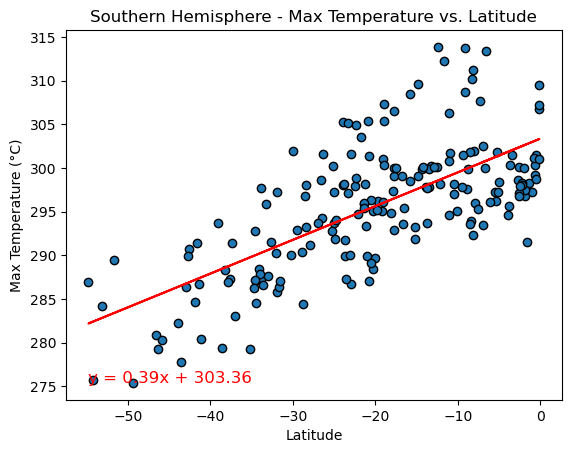

In [21]:
# Linear regression on Southern Hemisphere for Temperature vs. Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the linear regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', edgecolors='black')

# Add the regression line to the plot
plt.plot(x_values, regress_values, "r-")

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Set plot title and labels
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Print the r-squared value
print(f"R-squared: {r_value**2}")

# Save the plot as an image
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Southern_Hemi_Temp_vs_Lat.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** My analysis

In the Northern Hemisphere, there is a moderately strong negative correlation between latitude and temperature. As you move away from the equator (increasing latitude), the temperature tends to decrease.
The R-squared value of approximately 0.6739 suggests that the regression line fits the data moderately well. This means that about 67.39% of the variability in temperature can be explained by changes in latitude in the Northern Hemisphere.

In the Southern Hemisphere, there is a moderate positive correlation between latitude and temperature. As you move closer to the equator (decreasing latitude), the temperature tends to increase.
The R-squared value of approximately 0.4757 suggests that the regression line fits the data moderately well in the Southern Hemisphere. Around 47.57% of the variability in temperature can be explained by changes in latitude in the Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.01985867134725884


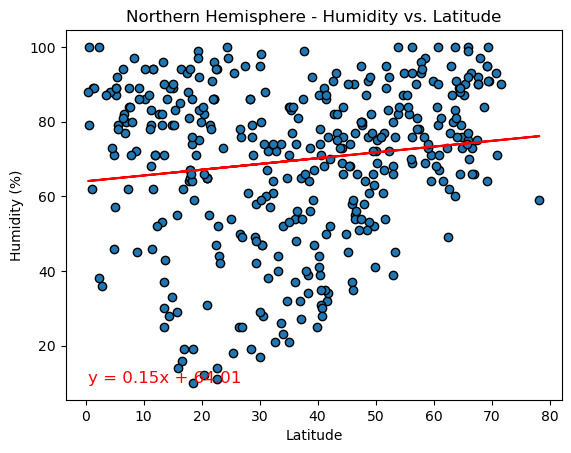

In [22]:
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the linear regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', edgecolors='black')

# Add the regression line to the plot
plt.plot(x_values, regress_values, "r-")

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Set plot title and labels
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print the r-squared value
print(f"R-squared: {r_value**2}")

# Save the plot as an image
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Northern_Hemi_Humidity_vs_Lat.png")

# Show the plot
plt.show()

R-squared: 0.02022255924753002


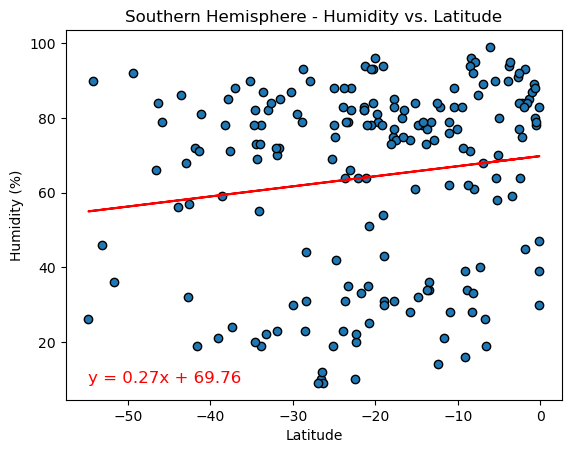

In [23]:
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the linear regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', edgecolors='black')

# Add the regression line to the plot
plt.plot(x_values, regress_values, "r-")

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Set plot title and labels
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print the r-squared value
print(f"R-squared: {r_value**2}")

# Save the plot as an image
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Southern_Hemi_Humidity_vs_Lat.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** My analysis

In the Northern Hemisphere, there is an extremely weak positive correlation between latitude and humidity. The regression line shows a slight upward trend in humidity as you move away from the equator (increasing latitude).
The R-squared value of approximately 0.0199 suggests that the regression line does not fit the data well. This means that changes in latitude in the Northern Hemisphere explain very little of the variability in humidity. The relationship is almost negligible.

In the Southern Hemisphere, there is also an extremely weak positive correlation between latitude and humidity. The regression line suggests a slight increase in humidity as you move closer to the equator (decreasing latitude).
The R-squared value of approximately 0.0202 indicates that the regression line poorly fits the data in the Southern Hemisphere. Changes in latitude explain very little of the variability in humidity, similar to the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.011252282820247353


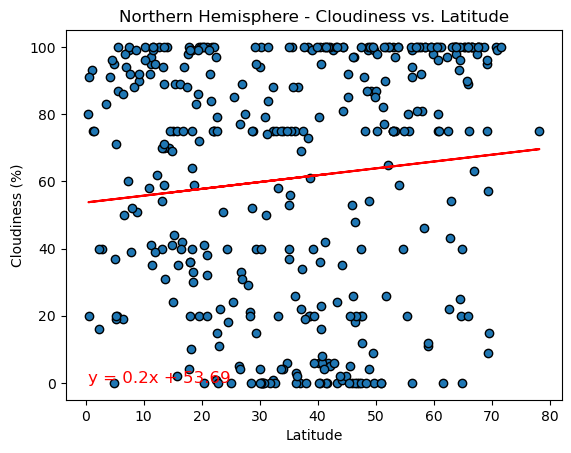

In [25]:
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the linear regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', edgecolors='black')

# Add the regression line to the plot
plt.plot(x_values, regress_values, "r-")

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Set plot title and labels
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print the r-squared value
print(f"R-squared: {r_value**2}")

# Save the plot as an image
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Northern_Hemi_Cloudiness_vs_Lat.png")

# Show the plot
plt.show()

R-squared: 0.05422432979723351


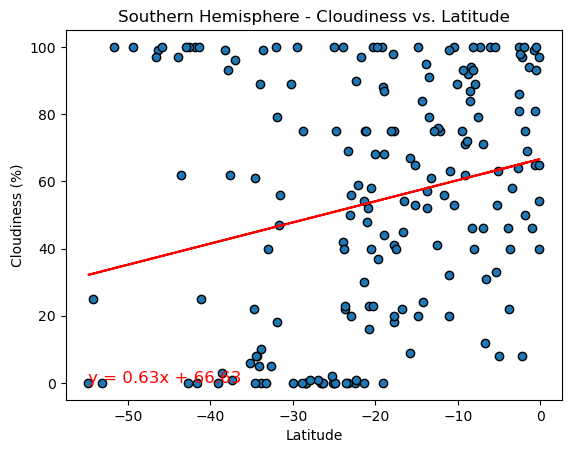

In [26]:
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the linear regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', edgecolors='black')

# Add the regression line to the plot
plt.plot(x_values, regress_values, "r-")

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Set plot title and labels
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print the r-squared value
print(f"R-squared: {r_value**2}")

# Save the plot as an image
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Southern_Hemi_Cloudiness_vs_Lat.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** My analysis

In the Northern Hemisphere, there is an extremely weak positive correlation between latitude and cloudiness. The regression line suggests a slight increase in cloudiness as you move away from the equator (increasing latitude).
The R-squared value of approximately 0.0113 indicates that the regression line has a very poor fit to the data. Changes in latitude explain an almost negligible amount of the variability in cloudiness. The relationship is almost non-existent.

In the Southern Hemisphere, there is a very weak positive correlation between latitude and cloudiness. The regression line suggests a slight increase in cloudiness as you move closer to the equator (decreasing latitude).
The R-squared value of approximately 0.0542 indicates that the regression line has a still poor, but slightly better fit compared to the Northern Hemisphere. Changes in latitude explain only a small fraction of the variability in cloudiness. The relationship is very weak.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 1.4459124534637377e-05


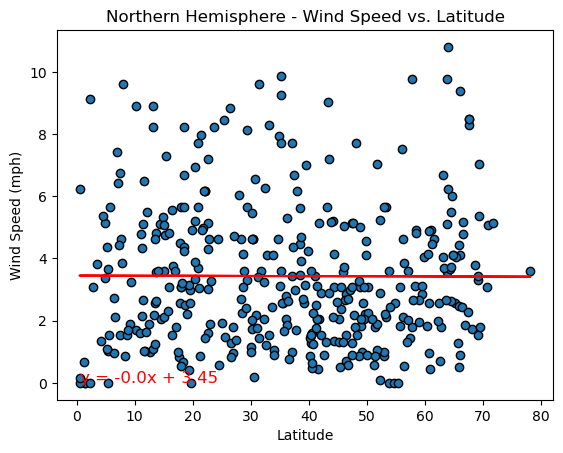

In [27]:
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the linear regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', edgecolors='black')

# Add the regression line to the plot
plt.plot(x_values, regress_values, "r-")

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Set plot title and labels
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the r-squared value
print(f"R-squared: {r_value**2}")

# Save the plot as an image
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Northern_Hemi_WindSpeed_vs_Lat.png")

# Show the plot
plt.show()


R-squared: 0.06980206999512416


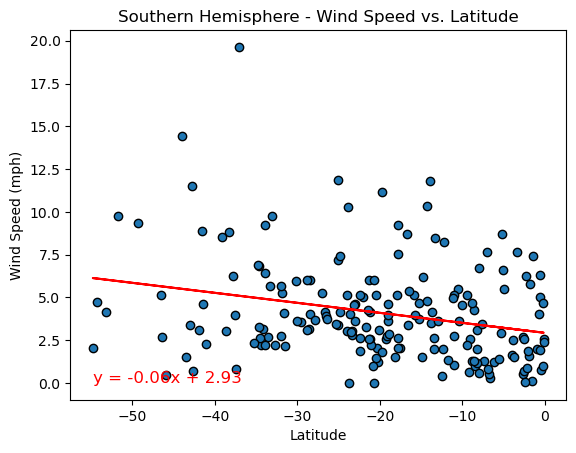

In [28]:
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the linear regression line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', edgecolors='black')

# Add the regression line to the plot
plt.plot(x_values, regress_values, "r-")

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Set plot title and labels
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the r-squared value
print(f"R-squared: {r_value**2}")

# Save the plot as an image
plt.savefig("C:\Class Folder\Weekly Challenges\Week 6\Python_api_challenge\WeatherandVacationPy/Southern_Hemi_WindSpeed_vs_Lat.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** My analysis

In the Northern Hemisphere, there is an extremely weak and practically non-existent correlation between latitude and wind speed. The regression line essentially suggests no meaningful relationship between latitude and wind speed.
The extremely low R-squared value of approximately 1.45e-05 indicates that the regression line does not fit the data at all. Latitude has almost no explanatory power in predicting wind speed.

In the Southern Hemisphere, there is a very weak negative correlation between latitude and wind speed. The regression line suggests a slight decrease in wind speed as you move closer to the equator (decreasing latitude).
The R-squared value of approximately 0.0698 is still relatively low, indicating that the regression line does not explain a significant portion of the variability in wind speed. However, compared to the Northern Hemisphere, the relationship is slightly stronger.
